In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf
import pandas as pd 
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

In [3]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2020,12,31)

In [4]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


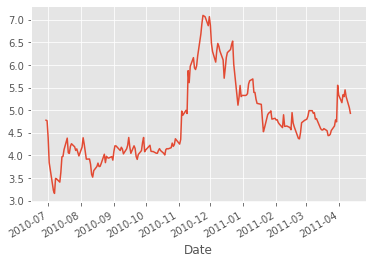

In [5]:
df['Adj Close'].head(200).plot()
plt.show()

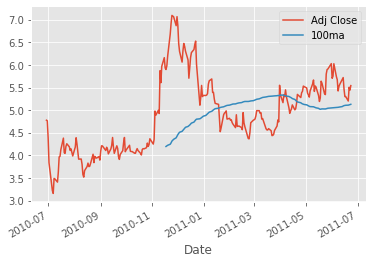

In [6]:
df['100ma'] = df['Adj Close'].rolling(100).mean()
df[['Adj Close', '100ma']].head(250).plot()
plt.show()

In [7]:
df_ohlc = df[['Adj Close']].resample('10D').ohlc()
df_vol = df['Volume'].resample('10D').sum()
df_ohlc['Volume'] = df_vol
print(df_ohlc)

             Adj Close                                           Volume
                  open        high         low       close             
Date                                                                   
2010-06-29    4.778000    4.778000    3.160000    3.492000  354060000.0
2010-07-09    3.480000    4.128000    3.410000    4.128000   97447500.0
2010-07-19    4.382000    4.382000    4.044000    4.144000   45924000.0
2010-07-29    4.070000    4.390000    3.918000    3.918000   27213000.0
2010-08-08    3.920000    3.920000    3.520000    3.830000   25751500.0
...                ...         ...         ...         ...          ...
2020-11-13  408.500000  499.269989  408.089996  489.609985  281229200.0
2020-11-23  521.849976  585.760010  521.849976  568.820007  341282400.0
2020-12-03  593.380005  649.880005  593.380005  609.989990  377377400.0
2020-12-13  639.830017  695.000000  622.770020  640.340027  527365500.0
2020-12-23  645.979980  705.669983  645.979980  705.669983  2037